In [1]:
# Dependencies
import matplotlib.pyplot as plt
# %matplotlib inline

import os
import pandas as pd
import numpy as np
import tensorflow as tf

import keras
from keras.preprocessing import image
from keras.applications.vgg19 import (
    VGG19, 
    preprocess_input, 
    decode_predictions
)

from pyspark.sql import SparkSession

Using TensorFlow backend.


In [2]:
artists_path= os.path.join("best-artworks-of-all-time","artists.csv")
artists_df_pd= pd.read_csv(artists_path)

In [3]:
artists_df_pd.head()

,id,name,years,genre,nationality,bio,wikipedia,paintings
0,0,Amedeo Modigliani,1884 - 1920,Expressionism,Italian,Amedeo Clemente Modigliani (Italian pronunciat...,http://en.wikipedia.org/wiki/Amedeo_Modigliani,193
1,1,Vasiliy Kandinskiy,1866 - 1944,"Expressionism,Abstractionism",Russian,Wassily Wassilyevich Kandinsky (Russian: Васи́...,http://en.wikipedia.org/wiki/Wassily_Kandinsky,88
2,2,Diego Rivera,1886 - 1957,"Social Realism,Muralism",Mexican,Diego María de la Concepción Juan Nepomuceno E...,http://en.wikipedia.org/wiki/Diego_Rivera,70
3,3,Claude Monet,1840 - 1926,Impressionism,French,Oscar-Claude Monet (; French: [klod mɔnɛ]; 14 ...,http://en.wikipedia.org/wiki/Claude_Monet,73
4,4,Rene Magritte,1898 - 1967,"Surrealism,Impressionism",Belgian,René François Ghislain Magritte (French: [ʁəne...,http://en.wikipedia.org/wiki/René_Magritte,194


In [4]:
# Load the VGG19 model
# https://keras.io/applications/#VGG19
model = VGG19(include_top=True, weights='imagenet')

Instructions for updating:
Colocations handled automatically by placer.


In [5]:
# Define default image size for VGG19
image_size = (224, 224)

In [6]:
def walklevel(some_dir, level=1):
    some_dir = some_dir.rstrip(os.path.sep)
    assert os.path.isdir(some_dir)
    num_sep = some_dir.count(os.path.sep)
    for root, dirs, files in os.walk(some_dir):
        yield root, dirs, files
        num_sep_this = root.count(os.path.sep)
        if num_sep + level <= num_sep_this:
            del dirs[:]

In [9]:
artist_path= os.path.join("best-artworks-of-all-time","images","images")
artist= "Diego_Rivera"
image_path_list= [[os.path.join(artist_path, artist, file),file] for root, dirs, files in walklevel(os.path.join(artist_path, artist)) for file in files]
print(image_path_list[0])
print(len(image_path_list))

['best-artworks-of-all-time\\images\\images\\Diego_Rivera\\Diego_Rivera_1.jpg', 'Diego_Rivera_1.jpg']
70


Diego_Rivera_10.jpg:
	[[('n03534580', 'hoopskirt', 0.6948836), ('n03866082', 'overskirt', 0.16366497), ('n02804414', 'bassinet', 0.02137045)]]
Diego_Rivera_11.jpg:
	[[('n02699494', 'altar', 0.52386326), ('n04418357', 'theater_curtain', 0.2797326), ('n04523525', 'vault', 0.03790552)]]


KeyboardInterrupt: 

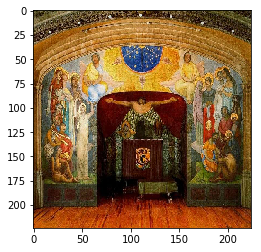

In [10]:
for image_path, image_name in image_path_list:
    img = image.load_img(image_path, target_size=image_size)
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    predictions = model.predict(x)
    top_3= decode_predictions(predictions, top= 3)
    if top_3[0][0][2] > .5:
        print(f"{image_name}:\n\t{top_3}")
        plt.imshow(img)